# Tomato Leaf disease classification

### Project Prerequisites

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

### Loading the training data

In [4]:
train_df = tf.keras.preprocessing.image_dataset_from_directory("Dataset/train",image_size=(256,256))
data_array = train_df.as_numpy_iterator()
batch = data_array.next()

class_names = train_df.class_names
class_names

Found 10000 files belonging to 10 classes.


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

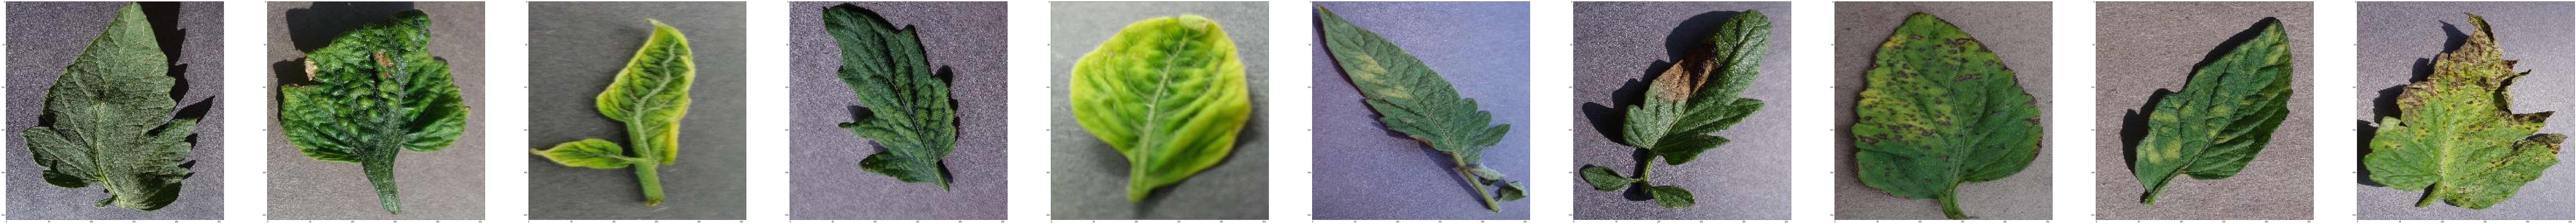

In [5]:
fig,ax = plt.subplots(ncols=10,figsize = (256,256))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))

### Preprocessing

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode="nearest"
)
val_datagen = ImageDataGenerator(rescale=1./255,)


preprocessed_train_data = datagen.flow_from_directory(
    "Dataset/train",
    target_size=(256,256),
    batch_size=8,
    class_mode="categorical")

preprocessed_val_data = val_datagen.flow_from_directory(
    "Dataset/val",
    target_size=(256,256),
    batch_size=8
)

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


### Building the Neural Network 

In [32]:
model = tf.keras.models.Sequential()

##### first convolution layer

In [33]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size = 3,input_shape = [256,256,3],activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

##### second convolution layer

In [34]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size = 3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Flattening and Output layer

In [35]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.LeakyReLU(0.2))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [36]:
model.compile(optimizer="adam",metrics = ["accuracy"],loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                3936320   
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)               

In [38]:
tfc = tf.keras.callbacks.TensorBoard(log_dir="logs")

hist = model.fit(x=preprocessed_train_data,
                 validation_data=preprocessed_val_data,
                 validation_batch_size=8,
                 epochs=5,
                 batch_size=16,
                 callbacks=tfc
                 )

Epoch 1/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0091 - accuracy: 0.9417 - val_loss: 0.0337 - val_accuracy: 0.7988
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0078 - accuracy: 0.9494 - val_loss: 0.0386 - val_accuracy: 0.7622
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0078 - accuracy: 0.9516 - val_loss: 0.0421 - val_accuracy: 0.7449
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0075 - accuracy: 0.9544 - val_loss: 0.0351 - val_accuracy: 0.7785
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0062 - accuracy: 0.9616 - val_loss: 0.0426 - val_accuracy: 0.7429


### Plotting the training history graph

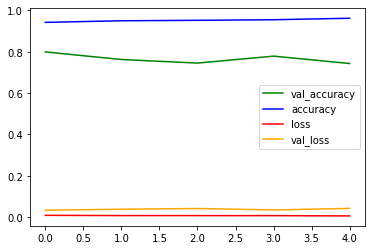

In [39]:
plt.plot(hist.history["val_accuracy"],color = "green")
plt.plot(hist.history["accuracy"],color = "blue")
plt.plot(hist.history["loss"],color = "red")
plt.plot(hist.history["val_loss"],color = "orange")
plt.legend(["val_accuracy","accuracy","loss","val_loss"])
plt.show()

### Testing

In [40]:
test_df = tf.keras.preprocessing.image_dataset_from_directory("Dataset/val",image_size=(256,256),shuffle=True)

Found 984 files belonging to 10 classes.


actual label: Tomato___Tomato_mosaic_virus
predicted label: Tomato___Tomato_mosaic_virus


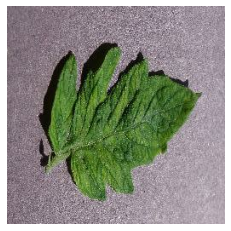

In [50]:
for images_batch, labels_batch in test_df.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")